In [1]:
## Bilby Practice
import numpy as np
import matplotlib.pyplot as plot
import bilby
import scipy

In [2]:
np.random.seed(123)

12:34 bilby INFO    : Running for label 'Gaussian Bayesian Inference', output will be saved to 'outdir'
12:34 bilby INFO    : Analysis priors:
12:34 bilby INFO    : mu=Uniform(minimum=0, maximum=10, name='mu', latex_label='mu', unit=None, boundary=None)
12:34 bilby INFO    : sigma=Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)
12:34 bilby INFO    : Analysis likelihood class: <class '__main__.My_likelihood'>
12:34 bilby INFO    : Analysis likelihood noise evidence: nan
12:34 bilby INFO    : Single likelihood evaluation took 1.559e-04 s
12:34 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:34 bilby WARNING : Using cached result
12:34 bilby INFO    : Summary of results:
nsamples: 2684
ln_noise_evidence:    nan
ln_evidence: -284.986 +/-  0.081
ln_bayes_factor:    nan +/-  0.081



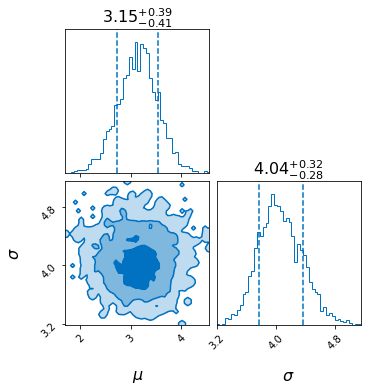

In [5]:
#1

my_prior = dict( mu = bilby.core.prior.Uniform(0,10,"mu"), 
              sigma = bilby.core.prior.Uniform(0,10,"sigma"))

class My_likelihood(bilby.Likelihood):

    def __init__(self,data):
        super().__init__(parameters={"mu": None, "sigma": None})
        self.data = data
        self.N = len(data)

    def log_likelihood(self):
        mu = self.parameters["mu"]
        sigma = self.parameters["sigma"]
        res = self.data - mu
        return -0.5 * (
            np.sum((res / sigma) ** 2) + self.N * np.log(2 * np.pi * sigma**2)
        )

data = np.random.normal(3,4,100)
likelihood = My_likelihood(data)

##Result
result = bilby.run_sampler(likelihood=likelihood,
                           priors = my_prior,
                           sampler = "dynesty",
                           nlive=1000,
                           outdir="outdir",
                           label = "Gaussian Bayesian Inference")

result.plot_corner()

In [6]:
result.samples

array([[3.98961077, 3.19187385],
       [1.88759984, 4.84973027],
       [2.06371584, 4.96366619],
       ...,
       [3.13631179, 3.98934292],
       [3.1468758 , 3.98078596],
       [3.14610571, 3.98054948]])